In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

Now we try to realize all things from lecture number 3. https://github.com/andriygav/School/blob/master/2018/Анализ%20данных/Lecture/Lecture3.pdf

I realy recommend to read the lecture before coding.

# Gradint descent

Для начала реализуем метод градиентного спуска

###### Напомним что это

Пусть у нас некоторая функция $f(\textbf{x})$, для которой мы хотим найти локальный минимум. Причем $\textbf{x}$ это некоторый вектор параметров.

Рассмотрим итеративный процесс, который на каждом шаге становить все ближе и ближе к точке $\textbf{x}_0$, к точке локального минимуму.

Рассмотрим некоторое начальное приближения минимума $\textbf{x}^0$.

Тогда каждая последующуя точка итеративного процесса будет вычисляться по формуле:

$$\textbf{x}^{n+1} = \textbf{x}^{n} - \alpha \nabla f(\textbf{x}^{n}),$$

где $\alpha$ - это некоторый параметр оптимизации, который мы задаем из вне, а $\nabla f(\textbf{x}^{n})$ - это градиент функции $f(\textbf{x})$ в точке $\textbf{x}^n$


Теперь вам нужно реализовать class, который делает один шаг нахождения локального минимума некоторой функции

In [4]:
class GD:
    def __init__(self, parameters, alpha = 0.01):
#             arguments: parameters is a np.array of model parametes of shape = [n],
#             alpha: the GD step parameter
#             returns: nothing
#             This function should save all data which users insert to init  
        self.__parameters = parameters
        self.__alpha = alpha
        pass
    def step(self, gradient):
#             arguments: gradient is a np.array of derivatives of the error function 
#                        by model parametes of shape = [n],
#                        (вектор производных функции ошибки по параметрам модели, тоесть градиент Q(w) по w)
#             returns: nothing
#             This function should upgrade vector of self.__parameters
# your code here
        pass
    def parameters(self):
#             arguments: nothing
#             returns: vector of parameters of shape = [n]
#             This function should return vector of parameters
# your code here
        pass

In [5]:
# Lets realize the error function for Linear Regression
# agruments: X is a np.array of shape = [L, n],
#            y is a np.array of shape = [L],
#            w is a np.array of shape = [n],
#                   where L is a number of object
#                         n is a number of features
# returns: the value of error function
def Q(X, y, w):
    return ((y - X@w).T@(y - X@w))/X.shape[0]

# Lets realize the function witch return a gradient for error function by parameters w
# agruments: X is a np.array of shape = [L, n],
#            y is a np.array of shape = [L],
#            w is a np.array of shape = [n],
#                   where L is a number of object
#                         n is a number of features
# returns: the value of derivatives of the error function by model parametes of shape = [n]
def dQ(X, y, w):
    return ((-2*X.T@np.reshape(y, [-1,1])+2*X.T@X@np.reshape(w, [-1,1]))/X.shape[0]).reshape(-1)

# Определим класс функции потерь, который имеет два метода
# Первый метод это метод который вовзращает нам ошибку
# Второй метод это метод возвращающий градиент по параметрам w
class ErrorFunction():
# В функции __init_ нам не нужно ничего делать, 
# так-как у нас нету внешних параметров.
    def __init__(self):
        pass
# В функции forward нам нужно просто вызвать внешнюю функцию Q
    def forward(self, X, y, w):
        return Q(X, y, w)
    
# В функции bacward нам нужно просто вызвать внешнюю функцию dQ
    def bacward(self, X, y, w):
        return dQ(X, y, w)

In [6]:

class LinearRegression:
    def __init__(self, n, Optimizer = GD, ErrorFunction = ErrorFunction):
#         arguments: n is a number of features in matrix X
#                    Optimizer is class of method which will change the parameters 
#                              to reduce the error(Now we know only Gradient Descent)
#                    ErrorFunction is a class of error function wich we will optimize
#         The function __init_ should save all parameters which users give in input of this function
# your code here
        pass
    
    def fit(self, X, y):
#         arguments: X is a np.array of data of shape = [L, n]
#                    y is a np.array of answers for the data of shape = [L]
#         returns: nothing
#         This function doing one step of optimization for data from input
# your code here
        pass
    
    def predict(self, X):
#         arguments: X is a np.array of data of shape = [L, n]      
#         returns: np.array of answers for X of shape = [L]
#         This function return answer for input data X
# your code here
        pass
                 
    def error(self, X, y):
#         arguments: X is a np.array of data of shape = [L, n]
#                    y is a np.array of answers for the data of shape = [L]
#         returns: a error of prediction for data X
# your code here
        pass

In [7]:
np.random.seed(0)

X = np.random.multivariate_normal(mean = np.zeros(10), cov = np.eye(10), size = 1000)
y = np.mean(X, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
LRR = LinearRegression(10)

In [9]:
NumberOfEpoch = 100

In [10]:
List_of_error_on_test = []
List_of_error_on_train = []

In [11]:
List_of_error_on_test.append(LRR.error(X_test, y_test))
List_of_error_on_train.append(LRR.error(X_train, y_train))

In [12]:
for i in range(NumberOfEpoch):
    LRR.fit(X_train, y_train)
    List_of_error_on_test.append(LRR.error(X_test, y_test))
    List_of_error_on_train.append(LRR.error(X_train, y_train))

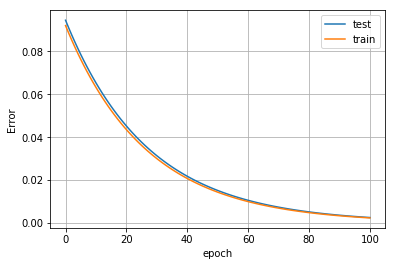

In [13]:
plt.plot(List_of_error_on_test, label = 'test')
plt.plot(List_of_error_on_train, label = 'train')

plt.grid()
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('Error')

plt.show()